In [1]:
using ReinforcementLearningAnIntroduction

using Plots

using StatsBase

In [2]:
env = CliffWalkingEnv()
ns = length(get_observation_space(env))
na = length(get_action_space(env))

4

In [3]:
create_ExpectedSARSA_agent(α) = Agent(
    policy=QBasedPolicy(
        learner=TDLearner(
            approximator=TabularApproximator(n_state=ns, n_action=na),
            optimizer=Descent(α),
            method=:ExpectedSARSA
        ),
        explorer=EpsilonGreedyExplorer(0.1)
    ),
    trajectory= EpisodicCompactSARTSATrajectory()
)

create_Q_agent(α) = Agent(
    policy=QBasedPolicy(
        learner=TDLearner(
            approximator=TabularApproximator(n_state=ns, n_action=na),
            optimizer=Descent(α),
            method=:SARS
        ),
        explorer=EpsilonGreedyExplorer(0.1)
    ),
    trajectory= EpisodicCompactSARTSATrajectory()
)

create_SARSA_agent(α) = Agent(
    policy=QBasedPolicy(
        learner=TDLearner(
            approximator=TabularApproximator(n_state=ns, n_action=na),
            optimizer=Descent(α),
            method=:SARSA
        ),
        explorer=EpsilonGreedyExplorer(0.1)
    ),
    trajectory= EpisodicCompactSARTSATrajectory()
)

create_SARSA_agent (generic function with 1 method)

In [4]:
function repeated_run(agent_creater, n, episode, is_mean=true)
    env = CliffWalkingEnv()
    rewards = []
    for _ in 1:n
        hook = TotalRewardPerEpisode()
        run(agent_creater(), env, StopAfterEpisode(episode;is_show_progress=false), hook)
        push!(rewards, is_mean ? mean(hook.rewards) : hook.rewards)
    end
    mean(rewards)
end

repeated_run (generic function with 2 methods)

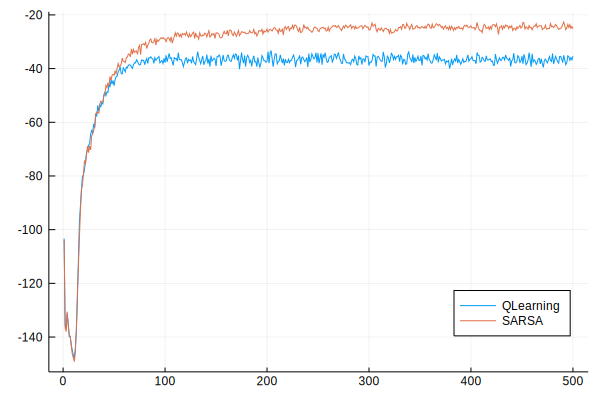

In [5]:
p = plot(legend=:bottomright)
plot!(p, repeated_run(() -> create_Q_agent(0.5), 1000, 500, false), label="QLearning")
plot!(p, repeated_run(() -> create_SARSA_agent(0.5), 1000, 500, false), label="SARSA")
p

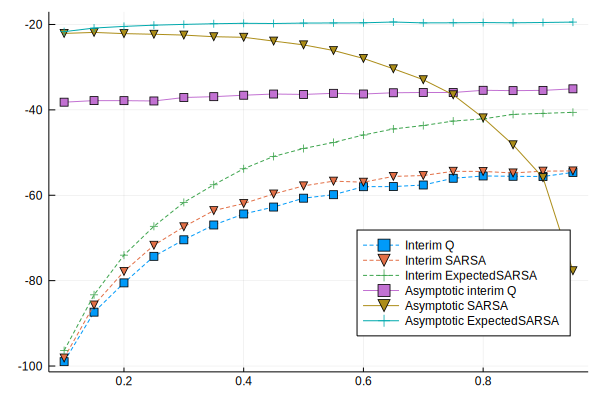

In [6]:
A = 0.1:0.05:0.95
p = plot(;legend=:bottomright)

plot!(p, A, [repeated_run(() -> create_Q_agent(α), 100, 100) for α in A], linestyle=:dash ,markershape=:rect, label="Interim Q")
plot!(p, A, [repeated_run(() -> create_SARSA_agent(α), 100, 100) for α in A], linestyle=:dash, markershape=:dtriangle, label="Interim SARSA")
plot!(p, A, [repeated_run(() -> create_ExpectedSARSA_agent(α), 100, 100) for α in A], linestyle=:dash, markershape=:cross, label="Interim ExpectedSARSA")

plot!(p, A, [repeated_run(() -> create_Q_agent(α), 10, 5000) for α in A], linestyle=:solid ,markershape=:rect, label="Asymptotic interim Q")
plot!(p, A, [repeated_run(() -> create_SARSA_agent(α), 10, 5000) for α in A], linestyle=:solid, markershape=:dtriangle, label="Asymptotic SARSA")
plot!(p, A, [repeated_run(() -> create_ExpectedSARSA_agent(α), 10, 5000) for α in A], linestyle=:solid, markershape=:cross, label="Asymptotic ExpectedSARSA")